#  Data Normalization
Data normalization is the process of transforming data to a common scale or range. Its main purposes are to improve model performance, facilitate convergence of optimization algorithms, and enhance data interpretability. Common methods include Min-Max Scaling (scaling data to a specific range), Z-Score Standardization (making data have a mean of 0 and a standard deviation of 1), and other custom scaling techniques. The choice of method depends on the data's characteristics and analysis requirements.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [46]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [48]:
df = data.copy()

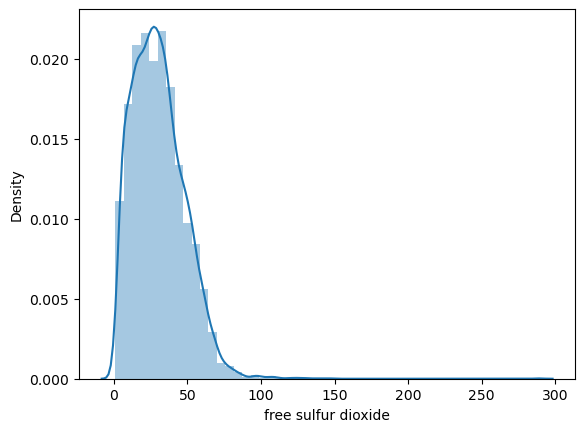

In [49]:
sns.distplot(df['free sulfur dioxide'])
plt.show()

# Max Absolute method

*  **value / max_value()**

In [50]:
df['free sulfur dioxide'] = df['free sulfur dioxide'] / df['free sulfur dioxide'].abs().max()

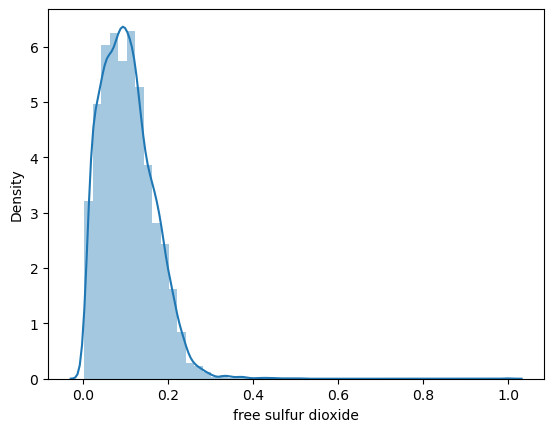

In [51]:
sns.distplot(df['free sulfur dioxide'])
plt.show()       # now the values will be distributed between 0 and 1

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

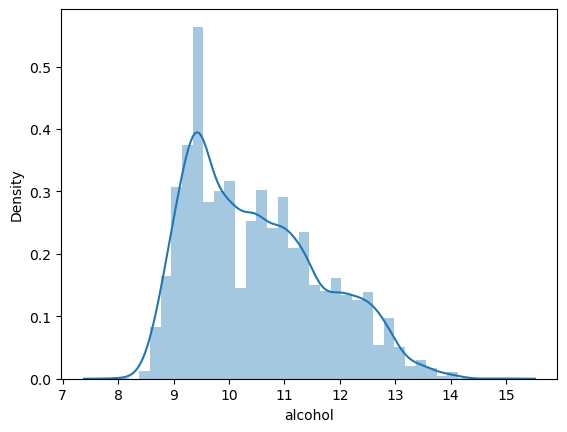

In [52]:
sns.distplot(df['alcohol'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

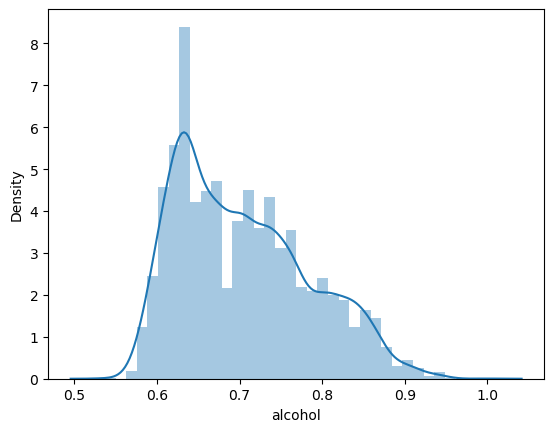

In [53]:
df['alcohol'] = df['alcohol'] / df['alcohol'].abs().max()

sns.distplot(df['alcohol'])

# Min-max scaler

####  **(value - min_value) / (max_value - min_value)**

In [54]:
df = data.copy()

In [55]:
df['free sulfur dioxide'] = (df['free sulfur dioxide']- df['free sulfur dioxide'].min()) / (df['free sulfur dioxide'].max() - df['free sulfur dioxide'].min())

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

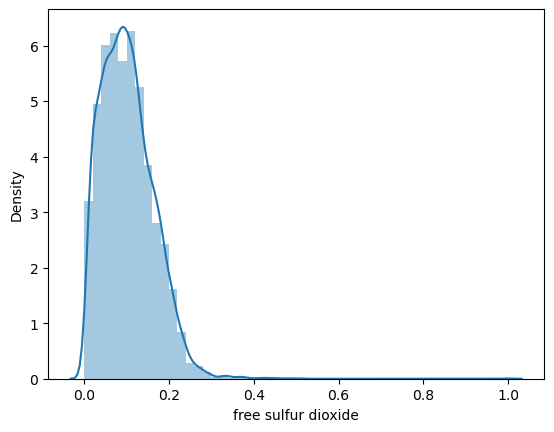

In [56]:
sns.distplot(df['free sulfur dioxide'])

In [57]:
# using it with libraries 

data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [58]:
X = data.drop(['type','quality'], axis = 1)
y = data['quality']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [60]:
# min- max scalefr of the input data

from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()
X_train_sc = msc.fit_transform(X_train)
X_test_sc = msc.fit_transform(X_test)

In [61]:
X_train_sc

array([[0.23728814, 0.08666667, 0.23493976, ..., 0.37795276, 0.20224719,
        0.47933884],
       [0.22033898, 0.17333333, 0.12048193, ..., 0.30708661, 0.12921348,
        0.16528926],
       [0.29661017, 0.08      , 0.26506024, ..., 0.32283465, 0.13483146,
        0.33057851],
       ...,
       [0.30508475, 0.11333333, 0.21686747, ..., 0.21259843, 0.14606742,
        0.16528926],
       [0.22033898, 0.1       , 0.19879518, ..., 0.46456693, 0.12359551,
        0.49586777],
       [0.26271186, 0.22666667, 0.12048193, ..., 0.26771654, 0.17977528,
        0.23140496]])

# standard scaler 

### z-score  method
### value - mean / std

In [62]:
df = data.copy()

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

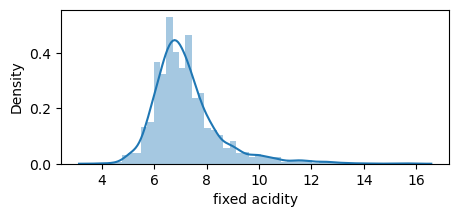

In [63]:
plt.figure(figsize = (5,2))
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

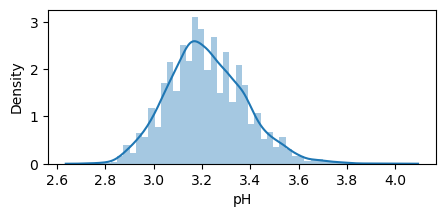

In [64]:
plt.figure(figsize = (5,2))
sns.distplot(df['pH'])

In [65]:
for col in ['fixed acidity', 'pH']:
    df[col] = df[col] - df[col].mean() / df[col].std()

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

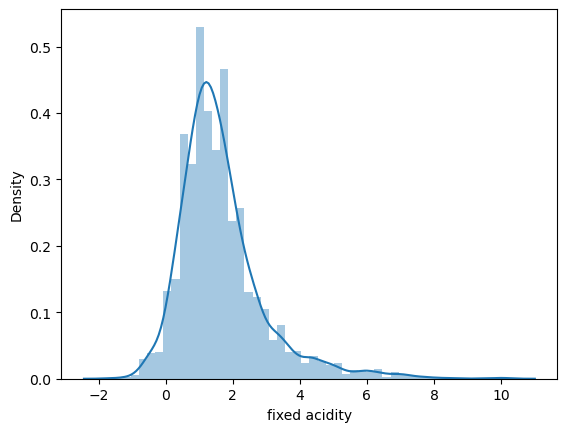

In [66]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

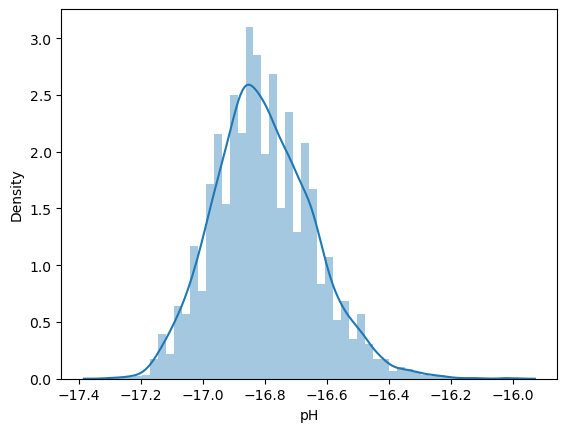

In [67]:
sns.distplot(df['pH'])

# from sklearn library we have 

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [70]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [71]:
X_train_sc

array([[-0.46920174, -0.78743806,  0.48695946, ...,  0.01094002,
         0.34331205,  0.34253464],
       [-0.62436363,  0.00591228, -0.81848972, ..., -0.5511172 ,
        -0.5415647 , -1.25010296],
       [ 0.0738649 , -0.84846501,  0.83049872, ..., -0.4262156 ,
        -0.47349726, -0.41187264],
       ...,
       [ 0.15144585, -0.54333026,  0.28083591, ..., -1.30052683,
        -0.33736238, -1.25010296],
       [-0.62436363, -0.66538416,  0.07471235, ...,  0.69789885,
        -0.60963215,  0.42635767],
       [-0.23645889,  0.49412787, -0.81848972, ..., -0.86337122,
         0.07104228, -0.91481083]])

MinMaxScaler and StandardScaler are both preprocessing techniques used to scale or normalize data before applying machine learning algorithms. Here are the key differences between them and when to use each:

**MinMaxScaler:**

- Scales the data to a specified range, typically between 0 and 1 by default.
- Preserves the relative relationships between data points, maintaining the original distribution shape.
- Useful when your algorithm relies on the magnitude of values and assumes that input features have a similar range, such as k-nearest neighbors (KNN) and artificial neural networks (ANN).

When to use MinMaxScaler:

1. When the algorithm you are using is sensitive to the scale of input features.
2. When you want to constrain the data to a specific range, such as [0, 1].
3. When you want to maintain the relative relationships between data points.
4. When your data doesn't follow a normal distribution, and you don't want to make any assumptions about its distribution.

**StandardScaler:**

- Standardizes the data by subtracting the mean and dividing by the standard deviation, resulting in a mean of 0 and standard deviation of 1.
- Shifts the data to have a mean of 0 and equalizes the spread or variance of each feature.
- Useful when your algorithm assumes that the input features are normally distributed or when you want to center the data to simplify interpretation.

When to use StandardScaler:

1. When your data follows a roughly normal distribution (bell curve).
2. When you want to remove the mean and scale features to unit variance.
3. When you are using algorithms that assume normally distributed data, such as linear regression, logistic regression, and support vector machines.
4. When you are performing dimensionality reduction techniques like Principal Component Analysis (PCA) or Linear Discriminant Analysis (LDA).

In summary, the choice between MinMaxScaler and StandardScaler depends on the specific requirements of your machine learning model and the characteristics of your data. If your data does not follow a normal distribution or if the scale of your features is important to the algorithm, use MinMaxScaler. If you want to standardize your data and assume normal distribution, use StandardScaler. Experimenting with both can help you determine which preprocessing technique works best for your particular problem.